In [4]:
import pandas as pd

df = pd.read_csv('dataset/merged_dataset_Arizona.csv')

In [5]:
df.head(10)

,STATION,NAME,DATE,AWND,CDSD,DSNW,EMNT,EMSN,EMXP,EMXT,...,SNOW,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,DSND,EMSD
0,USC00022659,"DOUGLAS, AZ US",2013-07,NaN,NaN,NaN,53.0,NaN,2.30,102.0,...,NaN,79.2,93.3,65.1,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00022659,"DOUGLAS, AZ US",2013-08,NaN,NaN,NaN,NaN,NaN,0.73,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00022659,"DOUGLAS, AZ US",2013-09,NaN,NaN,NaN,50.0,NaN,0.45,98.0,...,NaN,76.6,90.7,62.4,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00022659,"DOUGLAS, AZ US",2014-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00022659,"DOUGLAS, AZ US",2014-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USC00022659,"DOUGLAS, AZ US",2014-11,NaN,NaN,NaN,24.0,NaN,0.57,84.0,...,NaN,56.9,73.4,40.4,NaN,NaN,NaN,NaN,NaN,NaN
6,USC00022659,"DOUGLAS, AZ US",2014-12,NaN,NaN,NaN,20.0,NaN,0.50,76.0,...,NaN,50.8,67.2,34.4,NaN,NaN,NaN,NaN,NaN,NaN
7,USC00022659,"DOUGLAS, AZ US",2015-01,NaN,0.0,NaN,22.0,NaN,1.20,77.0,...,NaN,49.2,66.3,32.1,NaN,NaN,NaN,NaN,NaN,NaN
8,USC00022659,"DOUGLAS, AZ US",2015-02,NaN,1.0,NaN,32.0,NaN,0.20,82.0,...,NaN,58.2,76.0,40.4,NaN,NaN,NaN,NaN,NaN,NaN
9,USC00022659,"DOUGLAS, AZ US",2015-03,NaN,1.0,NaN,34.0,NaN,0.72,90.0,...,NaN,59.6,75.0,44.1,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13333 entries, 0 to 13332
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  13333 non-null  object 
 1   NAME     13333 non-null  object 
 2   DATE     13333 non-null  object 
 3   AWND     829 non-null    float64
 4   CDSD     3684 non-null   float64
 5   DSNW     6458 non-null   float64
 6   EMNT     4179 non-null   float64
 7   EMSN     6458 non-null   float64
 8   EMXP     11963 non-null  float64
 9   EMXT     4208 non-null   float64
 10  HDSD     3628 non-null   float64
 11  PRCP     12266 non-null  float64
 12  SNOW     6458 non-null   float64
 13  TAVG     4160 non-null   float64
 14  TMAX     4208 non-null   float64
 15  TMIN     4179 non-null   float64
 16  WDF2     831 non-null    float64
 17  WDF5     828 non-null    float64
 18  WSF2     831 non-null    float64
 19  WSF5     828 non-null    float64
 20  DSND     2347 non-null   float64
 21  EMSD     234

In [4]:
# Summary statistics
print(df.describe())

             AWND         CDSD         DSNW         EMNT         EMSN  \
count  829.000000  3684.000000  6458.000000  4179.000000  6458.000000   
mean     7.681062   734.247828     0.356457    33.302704     0.770084   
std      1.920602  1105.712105     1.151753    18.799617     2.520699   
min      3.400000     0.000000     0.000000   -21.000000     0.000000   
25%      6.300000     0.000000     0.000000    21.000000     0.000000   
50%      7.600000   132.000000     0.000000    32.000000     0.000000   
75%      8.900000  1110.250000     0.000000    47.000000     0.000000   
max     13.200000  5223.000000    12.000000    80.000000    36.000000   

               EMXP         EMXT         HDSD          PRCP         SNOW  \
count  11963.000000  4208.000000  3628.000000  12266.000000  6458.000000   
mean       0.532313    84.631179  1692.434950      1.342128     1.479963   
std        0.576125    15.212367  1936.457939      1.696592     5.679637   
min        0.000000    44.000000     0

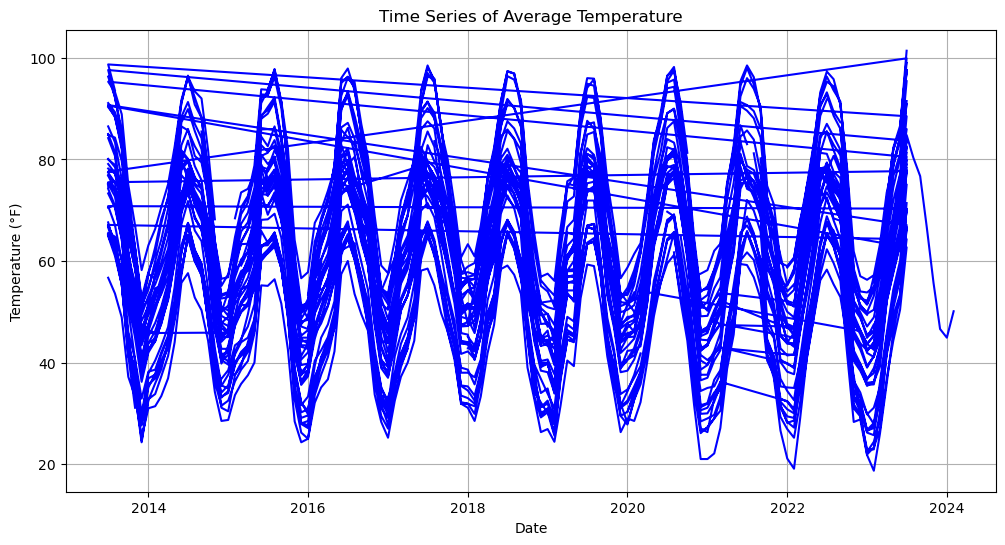

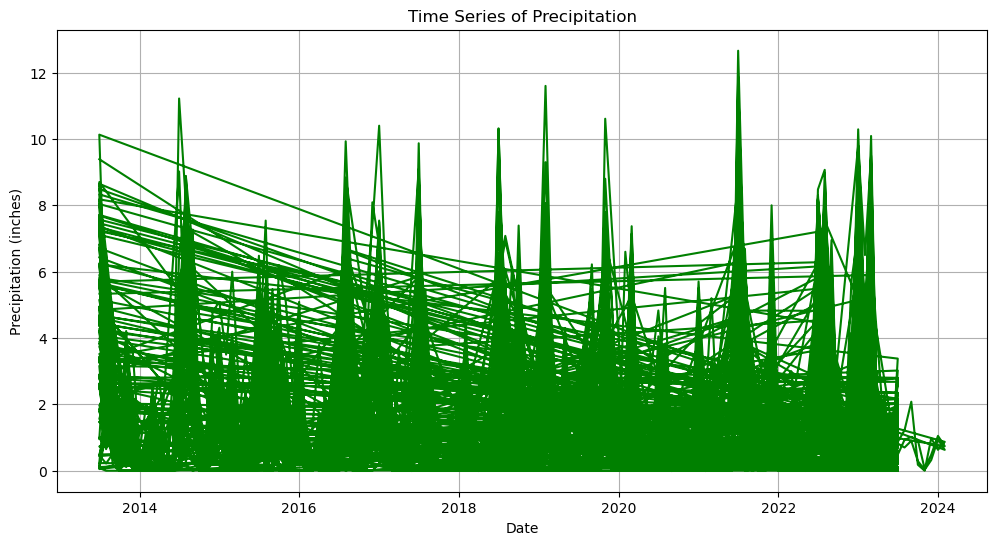

In [5]:
import matplotlib.pyplot as plt

# Convert the DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Plot time series of average temperature (TAVG) over time
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['TAVG'], color='blue')
plt.title('Time Series of Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.show()

# Plot time series of precipitation (PRCP) over time
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['PRCP'], color='green')
plt.title('Time Series of Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid(True)
plt.show()


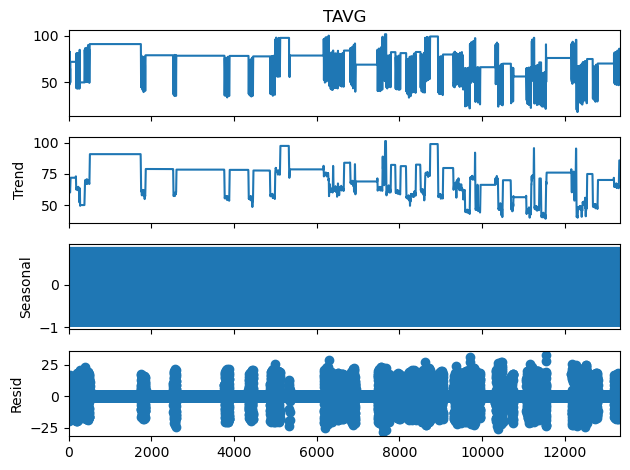

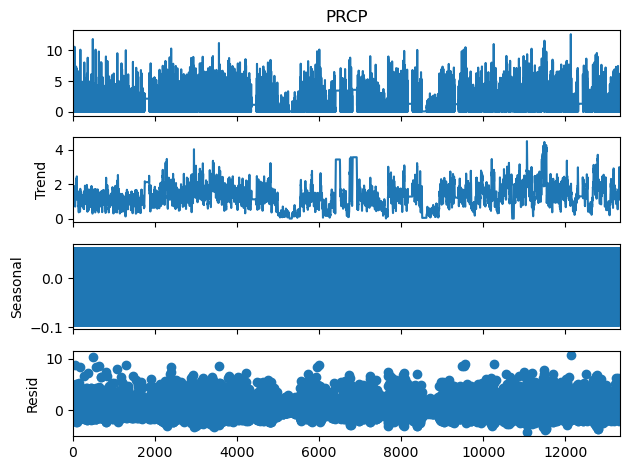

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values with forward fill (you can choose a different method if needed)
df['TAVG'] = df['TAVG'].fillna(method='ffill')

# Decompose the time series of average temperature (TAVG)
result_temp = seasonal_decompose(df['TAVG'], model='additive', period=12)  # Assuming seasonal period of 12 months

# Plot decomposition
result_temp.plot()
plt.show()

# Fill missing values with forward fill for precipitation as well
df['PRCP'] = df['PRCP'].fillna(method='ffill')

# Decompose the time series of precipitation (PRCP)
result_precip = seasonal_decompose(df['PRCP'], model='additive', period=12)  # Assuming seasonal period of 12 months

# Plot decomposition
result_precip.plot()
plt.show()


## Question 2

In [24]:
import pandas as pd
from scipy.stats import ttest_ind


# Parse the DATE column into datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE'].dt.month

0        7
1        8
2        9
3        7
4        8
        ..
13328    7
13329    1
13330    2
13331    4
13332    7
Name: DATE, Length: 13333, dtype: int32

In [25]:
oct_march_data = df[(df['DATE'].dt.month >= 10) | (df['DATE'].dt.month <= 3)]
april_sept_data = df[(df['DATE'].dt.month >= 4) | (df['DATE'].dt.month <= 9)]
#oct_march_data.shape
april_sept_data.shape

(13333, 22)

In [26]:
import pandas as pd
from scipy.stats import ttest_ind


# Parse the DATE column into datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Filter data for October-March and April-September
oct_march_data = df[(df['DATE'].dt.month >= 10) | (df['DATE'].dt.month <= 3)]
april_sept_data = df[(df['DATE'].dt.month >= 4) | (df['DATE'].dt.month <= 9)]

# climate variable to test 
climate_variable = 'PRCP'

# Perform t-test
t_stat, p_value = ttest_ind(oct_march_data[climate_variable], april_sept_data[climate_variable], nan_policy='omit')

# Define significance level
alpha = 0.05

# Print results
if p_value < alpha:
    print(f"The climate during October-March is significantly different from April-September (p-value: {p_value})")
else:
    print(f"The climate during October-March is not significantly different from April-September (p-value: {p_value})")


The climate during October-March is significantly different from April-September (p-value: 1.526068292912737e-10)


In [30]:
import pandas as pd
from scipy.stats import ttest_ind

def compare_climate_variables(df, climate_variables):
    # Parse the DATE column into datetime format
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Filter data for October-March and April-September
    oct_march_data = df[(df['DATE'].dt.month >= 10) | (df['DATE'].dt.month <= 3)]
    april_sept_data = df[(df['DATE'].dt.month >= 4) | (df['DATE'].dt.month <= 9)]

    results = {}

    for climate_variable in climate_variables:
        # Perform t-test
        t_stat, p_value = ttest_ind(oct_march_data[climate_variable], april_sept_data[climate_variable], nan_policy='omit')

        # Define significance level
        alpha = 0.05

        # Determine significance
        if p_value < alpha:
            results[climate_variable] = f"The climate during October-March is significantly different from April-September (p-value: {p_value})"
        else:
            results[climate_variable] = f"The climate during October-March is not significantly different from April-September (p-value: {p_value})"
    
    return results


climate_variables = ['PRCP', 'TAVG', 'WDF2']  

results = compare_climate_variables(df, climate_variables)
for climate_variable, result in results.items():
    print(f"Comparison for {climate_variable}: {result}")


Comparison for PRCP: The climate during October-March is significantly different from April-September (p-value: 1.526068292912737e-10)
Comparison for TAVG: The climate during October-March is significantly different from April-September (p-value: 5.223159128004277e-152)
Comparison for WDF2: The climate during October-March is significantly different from April-September (p-value: 0.0043284731295710555)


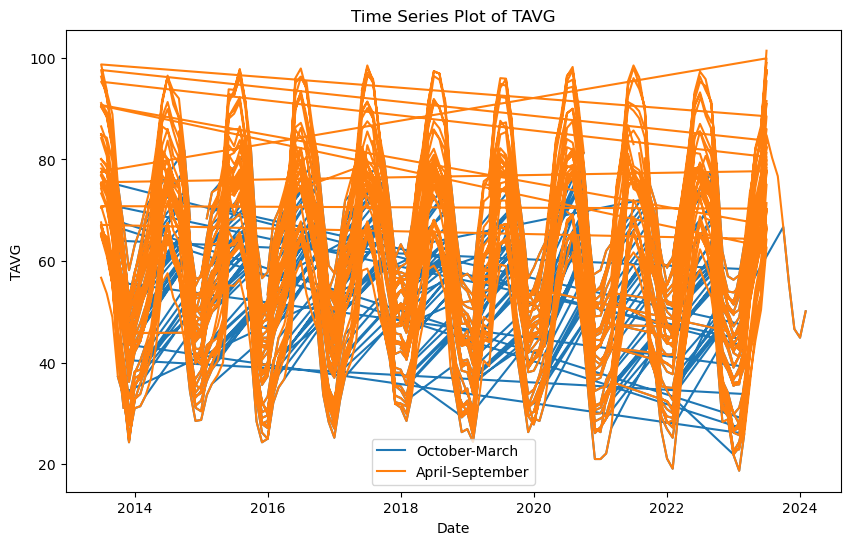

In [32]:
 # Plot time series
plt.figure(figsize=(10, 6))
plt.plot(oct_march_data['DATE'], oct_march_data['TAVG'], label='October-March')
plt.plot(april_sept_data['DATE'], april_sept_data['TAVG'], label='April-September')
plt.xlabel('Date')
plt.ylabel('TAVG')
plt.title(f'Time Series Plot of TAVG')
plt.legend()
plt.show()

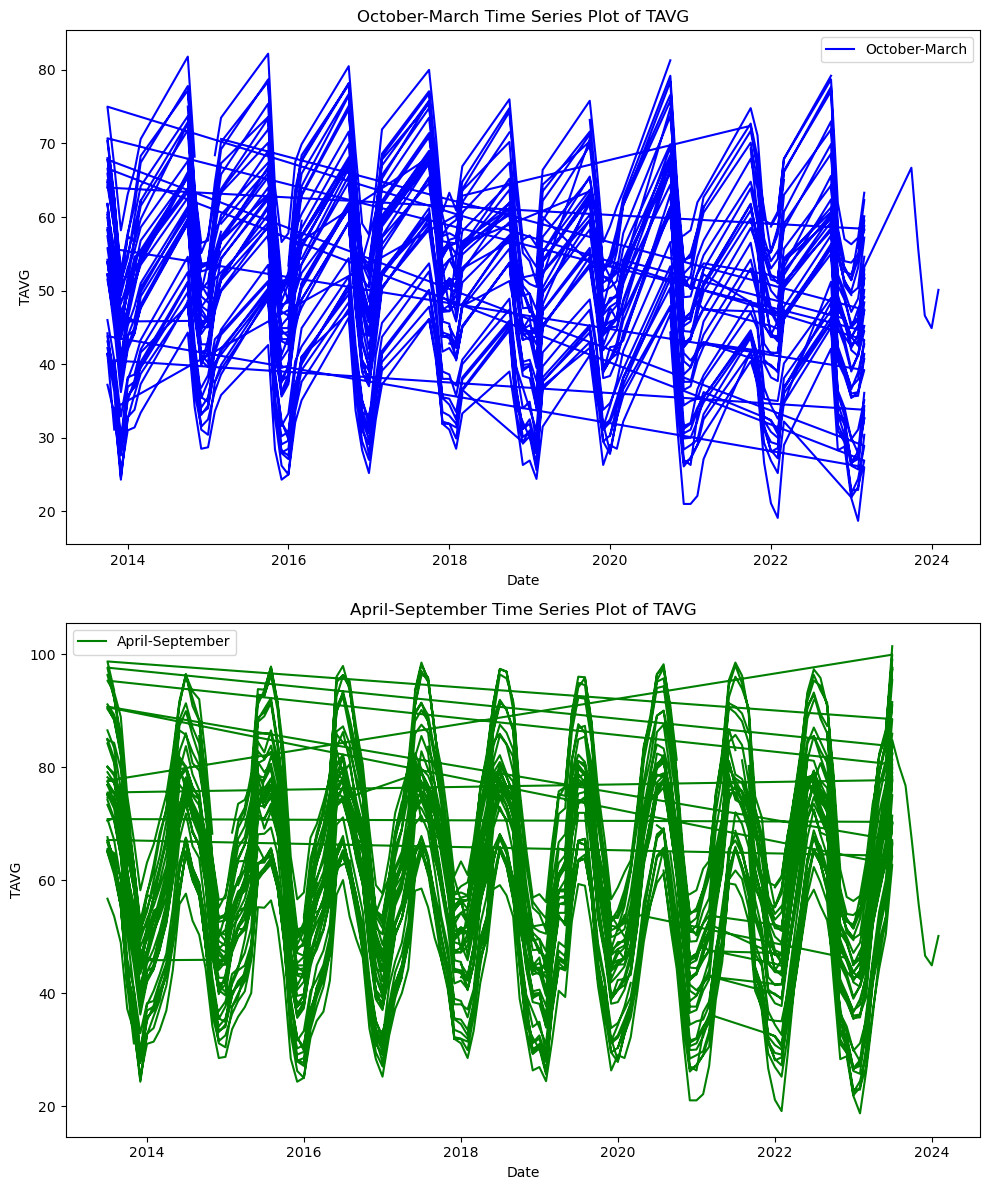

In [33]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(2, figsize=(10, 12))

# Plot October-March data
axs[0].plot(oct_march_data['DATE'], oct_march_data['TAVG'], label='October-March', color='blue')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('TAVG')
axs[0].set_title('October-March Time Series Plot of TAVG')
axs[0].legend()

# Plot April-September data
axs[1].plot(april_sept_data['DATE'], april_sept_data['TAVG'], label='April-September', color='green')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('TAVG')
axs[1].set_title('April-September Time Series Plot of TAVG')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


## Question 3

C:\Users\semon\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


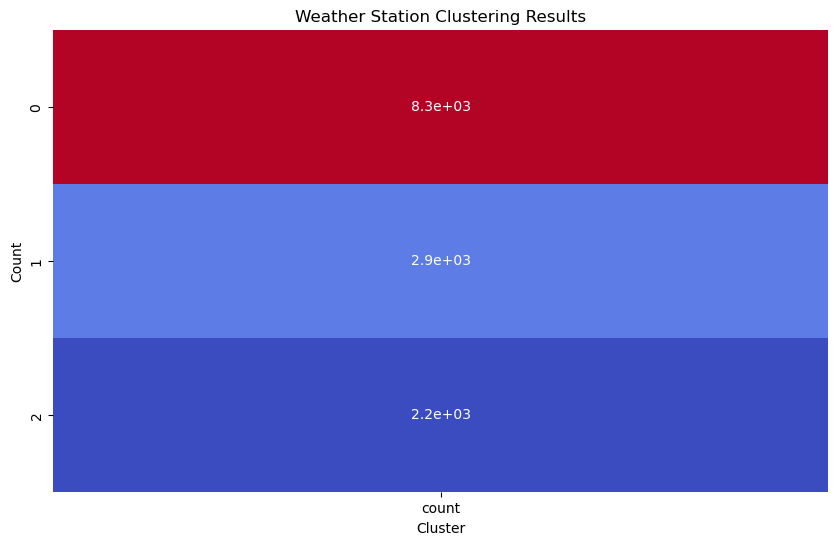

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
#df = pd.read_csv("your_dataset.csv")  # Replace "your_dataset.csv" with the actual filename

# Select relevant features for clustering
features = ['TAVG', 'PRCP']  # Example features, adjust as needed

# Drop rows with missing values for selected features
df = df.dropna(subset=features)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Choose the number of clusters (K)
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clustering results using a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(index=df['cluster'], columns='count'), annot=True, cmap='coolwarm', cbar=False)
plt.title('Weather Station Clustering Results')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Drop unnecessary columns
df.drop(['STATION', 'NAME', 'DATE'], axis=1, inplace=True)

# Handle missing values if any
df.fillna(0, inplace=True)  # Replace missing values with 0

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3)  # You can choose the number of clusters
kmeans.fit(scaled_data)
df['Cluster'] = kmeans.labels_

# Visualize the clustering results with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Cluster', axis=1), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Weather Stations Clustering Results')
plt.xlabel('Features')
plt.ylabel('Weather Stations')
plt.show()


C:\Users\semon\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 